<a href="https://colab.research.google.com/github/AjengSyifaa/Tugas-Machine-Learning/blob/main/UTS_Machine_Learning_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Persiapan Data**

In [442]:
train = pd.read_csv('/content/data_training.csv')
test = pd.read_csv('/content/data_testing.csv')

train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918


# **Pembersihan Data**

In [443]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


In [444]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         286 non-null    float64
 1   volatile acidity      286 non-null    float64
 2   citric acid           286 non-null    float64
 3   residual sugar        286 non-null    float64
 4   chlorides             286 non-null    float64
 5   free sulfur dioxide   286 non-null    float64
 6   total sulfur dioxide  286 non-null    float64
 7   density               286 non-null    float64
 8   pH                    286 non-null    float64
 9   sulphates             286 non-null    float64
 10  alcohol               286 non-null    float64
 11  Id                    286 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 26.9 KB


Tidak terdapat missing value pada data train dan data test

In [445]:
print(f"Jumlah baris duplikat pada data train : {train.duplicated().sum()}")
print(f"Jumlah baris duplikat pada data test : {test.duplicated().sum()}")

Jumlah baris duplikat pada data train : 0
Jumlah baris duplikat pada data test : 0


Tidak terdapat baris duplikat pada data train dan data test

In [446]:
train.nunique()

,0
fixed acidity,87
volatile acidity,125
citric acid,75
residual sugar,74
chlorides,123
free sulfur dioxide,52
total sulfur dioxide,129
density,339
pH,82
sulphates,82


In [447]:
# Menghapus kolom yang tidak memerlukan processing
train_clean = train.drop(columns=["Id"])

In [448]:
jumlah_kategori = train['quality'].nunique()
kategori_unik = np.sort(train['quality'].unique()).tolist()

print(f"Jumlah kategori 'quality': {jumlah_kategori}")
print(f"Kategori 'quality': {kategori_unik}")

Jumlah kategori 'quality': 6
Kategori 'quality': [3, 4, 5, 6, 7, 8]


In [449]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


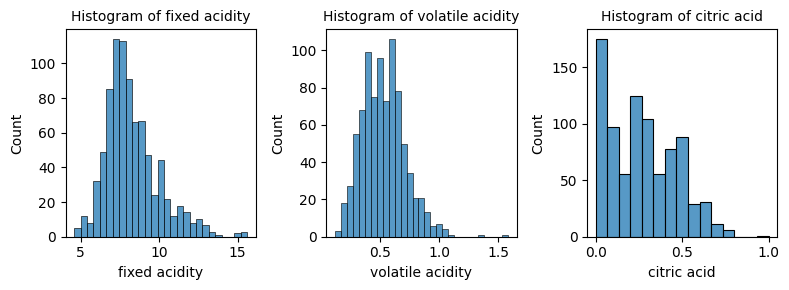

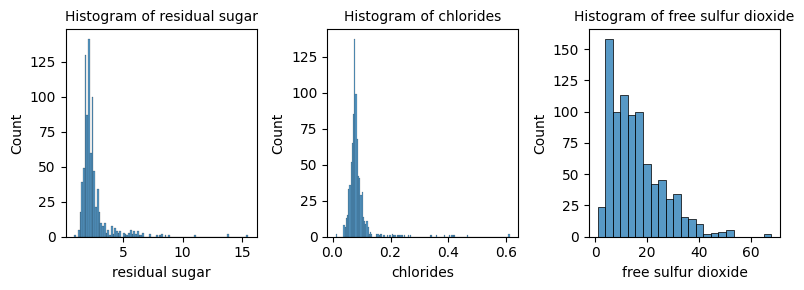

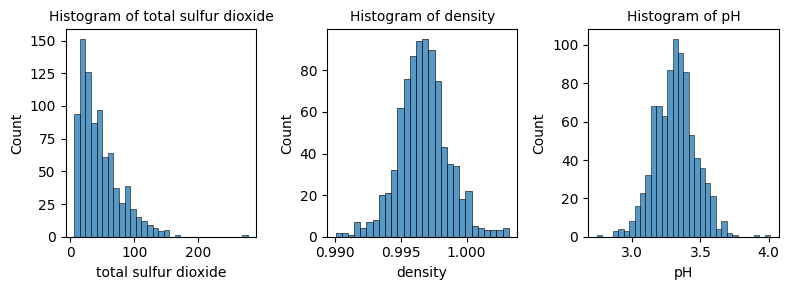

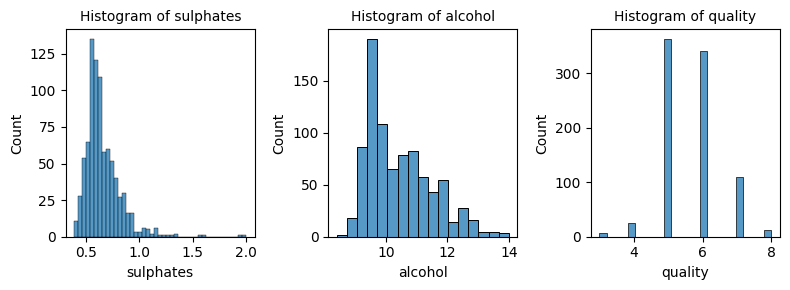

In [450]:
features = [col for col in train_clean.columns]

def plot_histograms(train_clean, features):

    for i in range(4):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(8,3))

        ax1 = sns.histplot(train_clean[features[i*3]], ax=ax1)
        ax1.set_title(f'Histogram of {features[i*3]}', size=10)

        ax2 = sns.histplot(train_clean[features[i*3+1]], ax=ax2)
        ax2.set_title(f'Histogram of {features[i*3+1]}', size=10)

        if i < 3 or len(features) == 12:
            ax3 = sns.histplot(train_clean[features[i*3+2]], ax=ax3)
            ax3.set_title(f'Histogram of {features[i*3+2]}', size=10)
        plt.tight_layout()
plot_histograms(train_clean, features)

terlihat bahwa beberapa variabel (seperti **density dan PH**) hampir berbentuk Gaussian, beberapa di antaranya berada dalam situasi antara (seperti **sulphates dan total sulfur dioxide**), sementara variabel lain memiliki kemiringan dan/atau kurtosis yang kuat (**dresidual sugar dan chlorides**). Ini berarti bahwa variabel tersebut seharusnya memiliki jumlah outlier yang tidak dapat diabaikan. Outlier ini dapat memengaruhi hasil model klasifikasi. Ini berarti bahwa variabel yang miring perlu ditransformasikan (agar menyerupai kurva yang lebih teratur) atau outliernya harus dibatasi atau dihilangkan.

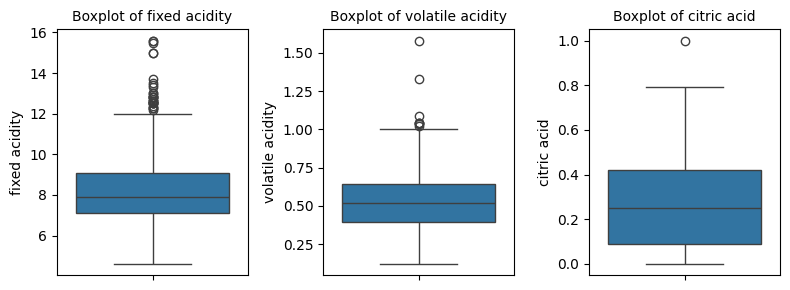

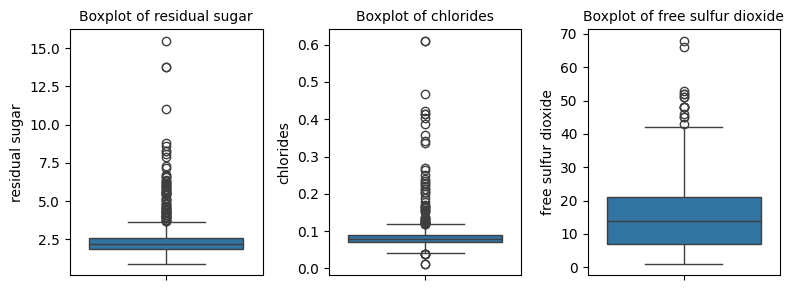

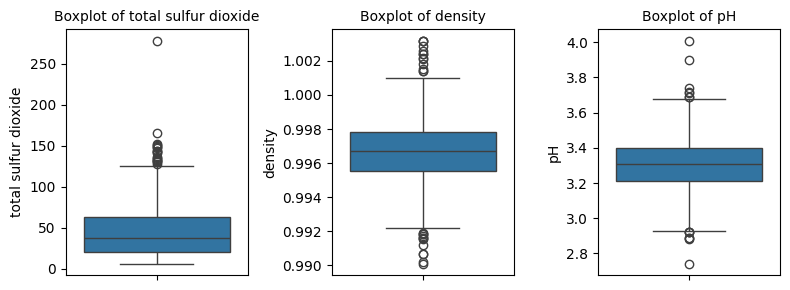

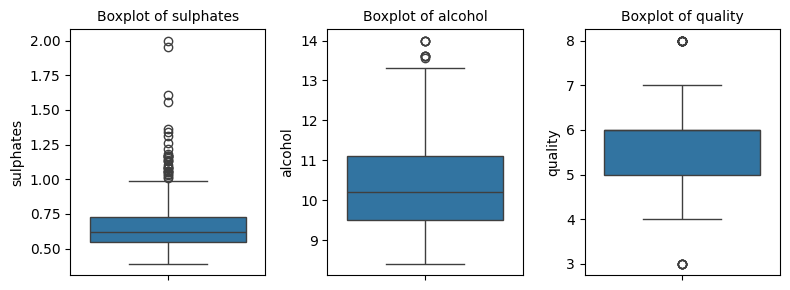

In [451]:
# cek outlier dengan boxplot
def plot_boxplots(train_clean, features):

    for i in range(4):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(8,3))

        ax1 = sns.boxplot(train_clean[features[i*3]], ax=ax1)
        ax1.set_title(f'Boxplot of {features[i*3]}', size=10)

        ax2 = sns.boxplot(train_clean[features[i*3+1]], ax=ax2)
        ax2.set_title(f'Boxplot of {features[i*3+1]}', size=10)

        if i < 3 or len(features) == 12:
            ax3 = sns.boxplot(train_clean[features[i*3+2]], ax=ax3)
            ax3.set_title(f'Boxplot of {features[i*3+2]}', size=10)
        plt.tight_layout()
plot_boxplots(train_clean, features)

In [452]:
# cek outlier berdasarkan IQR
print("=== Outlier di Kolom Numerik (berdasarkan IQR) ===")
for col in train_clean:
    Q1 = train_clean[col].quantile(0.25)
    Q3 = train_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = train_clean[(train_clean[col] < lower) | (train_clean[col] > upper)]
    print(f"- {col}: {len(outliers)} outlier")

=== Outlier di Kolom Numerik (berdasarkan IQR) ===
- fixed acidity: 30 outlier
- volatile acidity: 8 outlier
- citric acid: 1 outlier
- residual sugar: 76 outlier
- chlorides: 59 outlier
- free sulfur dioxide: 15 outlier
- total sulfur dioxide: 19 outlier
- density: 25 outlier
- pH: 14 outlier
- sulphates: 31 outlier
- alcohol: 9 outlier
- quality: 19 outlier


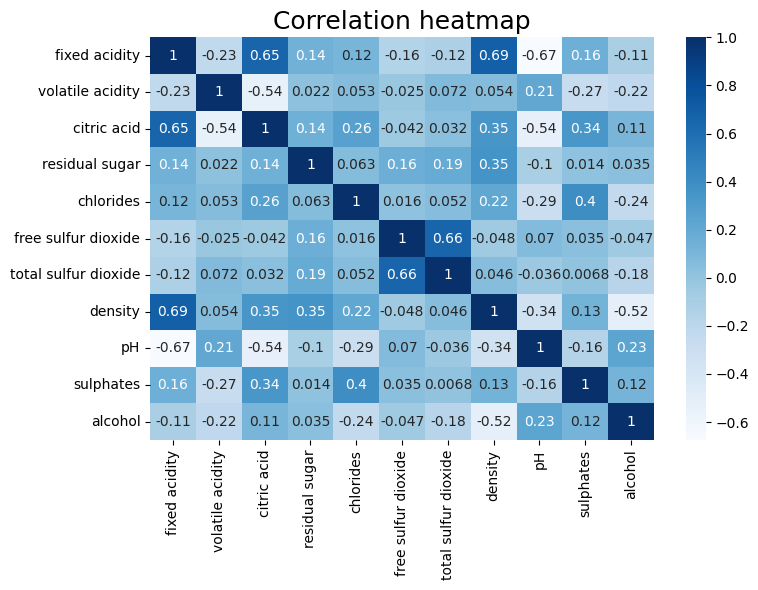

In [453]:
plt.figure(figsize=(8,6))
sns.heatmap(train_clean.drop('quality', axis=1).corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation heatmap', fontsize=18)
plt.tight_layout()
plt.show()

Heatmap korelasi di atas menunjukkan hubungan antar fitur dalam dataset. Terlihat bahwa fixed acidity berkorelasi positif kuat dengan citric acid (0.65) dan density (0.69), serta negatif dengan pH (-0.67). Free sulfur dioxide juga berkorelasi kuat dengan total sulfur dioxide (0.66), dan alcohol menunjukkan korelasi negatif dengan density (-0.52). Sementara itu, kolom Id tidak berkorelasi signifikan dengan fitur lain karena hanya berfungsi sebagai penanda. Visualisasi ini membantu mengidentifikasi hubungan antar variabel yang penting untuk analisis lebih lanjut.

In [454]:
# cek distribusi data
from scipy.stats import shapiro

for col in train_clean:
    stat, p = shapiro(train_clean[col].dropna())
    print(f'{col}: p-value={p}')
    if p > 0.05:
        print(f"   {col} Distribusi normal")
    else:
        print(f"   {col} Distribusi tidak normal")

fixed acidity: p-value=6.319147121598529e-19
   fixed acidity Distribusi tidak normal
volatile acidity: p-value=6.677679965577654e-11
   volatile acidity Distribusi tidak normal
citric acid: p-value=1.0598136808243692e-15
   citric acid Distribusi tidak normal
residual sugar: p-value=3.9500031447980376e-41
   residual sugar Distribusi tidak normal
chlorides: p-value=1.0211349673280032e-44
   chlorides Distribusi tidak normal
free sulfur dioxide: p-value=1.0266462634949731e-22
   free sulfur dioxide Distribusi tidak normal
total sulfur dioxide: p-value=6.800322922168191e-25
   total sulfur dioxide Distribusi tidak normal
density: p-value=6.176473739474555e-06
   density Distribusi tidak normal
pH: p-value=0.006653861498257712
   pH Distribusi tidak normal
sulphates: p-value=8.841569529033594e-29
   sulphates Distribusi tidak normal
alcohol: p-value=1.1722141528836103e-19
   alcohol Distribusi tidak normal
quality: p-value=5.298597054540707e-27
   quality Distribusi tidak normal


In [455]:
x_train = train_clean.drop(columns=['quality'])
y_train = train_clean['quality']

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)

x_train :  (857, 11)
y_train :  (857,)


Berdasarkan hasil pemeriksaan outlier dan distribusi data, tahap feature scaling akan menggunakan **MinMaxScaler** karena data memiliki outlier dan tidak berdistribusi normal.


In [456]:
# feature scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.30,0.897959,-0.515152,-0.714286,0.75,-0.285714,0.166667,-0.403509,-0.368421,-0.666667,-0.2500
1,0.10,0.224490,-0.090909,-0.142857,-0.10,-0.142857,0.642857,0.008772,-0.105263,-0.611111,-0.6250
2,1.10,-0.367347,0.454545,0.571429,0.65,-0.071429,0.333333,0.728070,-0.473684,0.111111,-0.1250
3,2.50,-0.081633,0.909091,0.857143,-0.35,-0.500000,-0.333333,1.508772,-1.157895,0.333333,0.4375
4,0.25,-0.653061,0.212121,0.000000,0.10,1.285714,0.976190,-0.122807,-0.052632,0.555556,0.5000


# **Pembuatan Model**

Model yang diuji meliputi Decision Tree, Random Forest, Logistic Regression, K-Nearest Neighbors (KNN), dan, Support Vector Machine (SVM).

In [457]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [458]:
# cek akurasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x_train_part, x_val, y_train_part, y_val = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

print("Accuracy Model :")
for name, model in models.items():
    model.fit(x_train_part, y_train_part)
    y_pred = model.predict(x_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"Model {name}", "Accuracy:", acc)

Accuracy Model :
Model Decision Tree Accuracy: 0.4883720930232558
Model Random Forest Accuracy: 0.6395348837209303
Model Logistic Regression Accuracy: 0.5988372093023255
Model KNN Accuracy: 0.5
Model SVM Accuracy: 0.5465116279069767


Confusion Matrix Model :


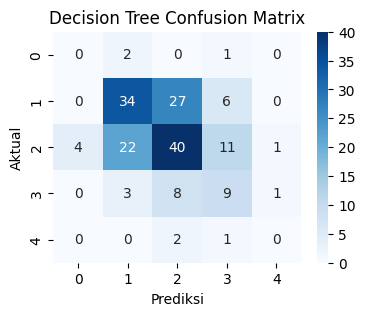

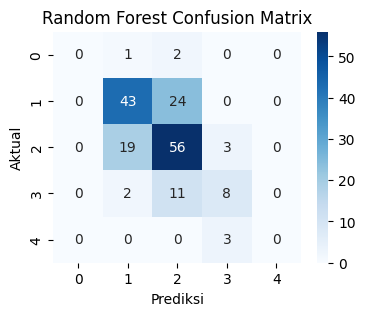

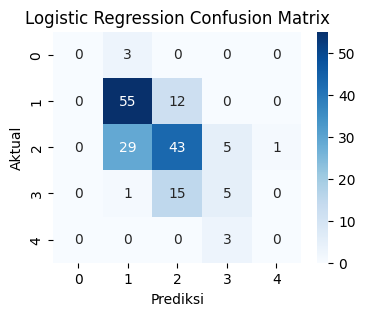

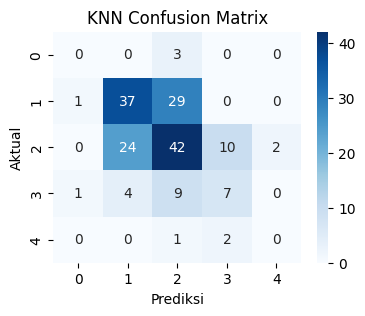

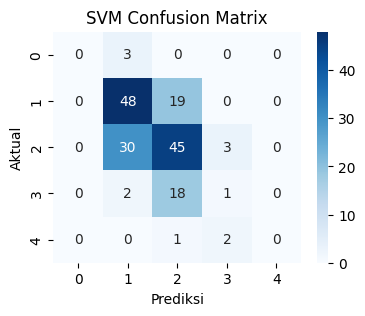

In [459]:
# cek Confusion Matrix
print("Confusion Matrix Model :")
for name, model in models.items():
    model.fit(x_train_part, y_train_part)
    y_pred = model.predict(x_val)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

Berdasarkan pemeriksaan **akurasi**, dua model dengan akurasi tertinggi adalah Random Forest da Logistic Regression.

Berdasarkan **Confusion matrix** di atas menunjukkan bahwa :
- **Model Random Forest** cukup akurat dalam mengklasifikasikan kelas 1 dan 2, meskipun masih terjadi kesalahan, terutama antara kedua kelas tersebut. Terdapat kebingungan antara kelas 2 dan 3, serta model kesulitan mengenali kelas 0 dan 4 yang datanya sangat sedikit. Secara keseluruhan, meskipun model random Forest menunjukkan performa yang cukup baik di beberapa kelas, masih ada ruang untuk perbaikan terutama dalam menangani misclassifications dan kelas minoritas.
- **Model Logistic Regression** cukup baik dalam mengklasifikasikan kelas 1 (55 benar), tetapi sering tertukar dengan kelas 2 (12 salah). Kelas 2 juga sering salah diklasifikasikan sebagai kelas 1 (29 kali) dan kelas 3 (5 kali), menandakan adanya kemiripan antar kelas. Kelas 3 paling sering salah diprediksi sebagai kelas 2, hanya 1 prediksi yang benar. Sementara itu, kelas 0 dan 4 tidak pernah diklasifikasikan dengan benar, kemungkinan karena jumlah datanya sangat sedikit.
Secara keseluruhan, meskipun model Logistic Regression memiliki kekuatan dalam mengenali pola utama, masih terdapat kelemahan dalam menangani data tidak seimbang dan kelas yang mirip.


Untuk mendapatkan model yang optimal dilakukan Hyperparameter Tuning

In [460]:
# tuning
from sklearn.model_selection import GridSearchCV

param_grids = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    }
}

In [461]:
best_models = {}

for name, mp in param_grids.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train_part, y_train_part)
    best_models[name] = grid.best_estimator_

    print(f"Best params for {name}: {grid.best_params_}")
    print("Validation Accuracy:", grid.score(x_val, y_val))
    print("="*50)

Tuning Random Forest...
Best params for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: 0.6453488372093024
Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Validation Accuracy: 0.5988372093023255


# **Prediksi Data Uji**

Prediksi data test menggunakan model dengan akurasi tertinggi yakni RandomForestClassifier.

In [463]:
# prediksi data test

best_model = RandomForestClassifier()
best_model.fit(x_train, y_train)
test_for_prediction = test.drop(columns=['Id'])
hasil_predictions = best_model.predict(test_for_prediction)
hasil_predictions_df = pd.DataFrame({
    'Id': test['Id'],
    'quality': hasil_predictions
})
hasil_predictions_df.to_csv('hasilprediksi_002.csv', index=False)
hasil_predictions_df.head()

,Id,quality
0,222,5
1,1514,6
2,417,5
3,754,5
4,516,5
